# Team Project 5 - Singular Value Decomposition and Image Processing

The Singular Value Decomposition (SVD) has many applications in pure mathematics, applied mathematics, and data science. A common theme of many applications of SVD is that for a matrix $A$, by using SVD, we can find a new matrix $A_k$ which is a good approximation of $A$, but the rank of $A_k$ is at most $k$. In general, a small rank matrix can be described with a lower number of entries; we can regard $A_k$ as a "compression" of $A$.

The goal of this project is twofold. First of all, we investigate how to compress image data using the already implemented SVD calculation method. Secondly, we will make a code for a few steps of the SVD calculation.

##### 1. (10 pts) Construct a method **GramSchmidt(A)** where $A = [\mathbf{v}_1, \mathbf{v}_2, \cdots, \mathbf{v}_n]$ is an invertible matrix, and its output is an orthogonal matrix $Q = [\mathbf{w}_1, \mathbf{w}_2, \cdots, \mathbf{w}_n]$ where its column vectors is an orthonormal basis obtained by applying the Gram-Schmidt process to $\{\mathbf{v}_1, \mathbf{v}_2, \cdots, \mathbf{v}_n\}$.

2. (10 pts) Construct a method **QRdecomposition(A)** where $A$ is an invertible matrix and the output is a pair of matrices $[Q, R]$, that is the QR decomposition of $A$. In other words, $A = QR$ and $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix.

##### 3. (10 pts) A key step on the diagonalization of a symmetric matrix (and hence on SVD) is the QR method. Construct a method **QRalgorithm(A, err)** where $A$ is a symmetric tridiagonal matrix, err is a positive real number, and output is a list of eigenvalues of $A$. Let $A^{(k)}$ be the output of $k$-th iteration (See the notation in the lecture note) and let $e^{(k)}$ be the vector consisting of diagonal entries of $A^{(k)}$. Stop the iteration if either


*   $k = 1000$ or;
*   $||e^{(k)} - e^{(k-1)}||_{\infty} < \mathrm{err}$.

##### Let $M$ be a $(10 \times 10)$ symmetric tridiagonal matrix such that $$M_{ij} = \begin{cases}11-i, & \mbox{if } i = j,\\1, & \mbox{if } i = j+1 \mbox{ or } i = j-1,\\0, & \mbox{otherwise}.\end{cases}$$
##### By using **QRalgorithm(A, err)**, compute eigenvalues of $M$. Set $\mathrm{err} = 10^{-5}$.

From now on, we will discuss image processing with Python. For simplicity, we are going to use a grayscale (black and white) image only. Below is how to convert a grayscale image to a python matrix. Matplotlib can only read the .png file natively.

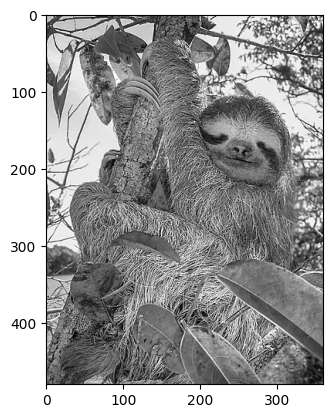

In [12]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import numpy.linalg as la

response = requests.get('https://drive.google.com/uc?export=view&id=1Di59ub7nRPQRWpWZqaxWUzBRGnny8imU', stream=True)
sloth_img = Image.open(BytesIO(response.content))
sloth_img_array = np.array(sloth_img)[:,:,0]
# These three lines read 'sloth_gray.png' and record it as an array.

plt.imshow(sloth_img_array, cmap='gray')
# A matrix can be converted and shown to a grayscale image.



In the above code, <b>sloth_img_array</b> is a matrix. Thus we can compute its SVD and use it to do some image processing.

For a matrix $A$, <b>svd</b> method in the linear algebra module can be used to calculate its SVD. The output is a triplet of data $U$, $D$, and $V^t$, where $U$ and $V^t$ are orthogonal matrices and $D$ is a list of singular values of $A$ (not a diagonal matrix!). So if we denote $S$ as the diagonal matrix whose diagonal entries are numbers on $D$, then $A = USV^t$.

In [4]:
A = np.array([[1,0,1],[0,1,0],[0,1,1],[0,1,0],[1,1,0]])
U, D, Vt = la.svd(A, full_matrices = True)
print("U=", U)
print("D=", D)
print("V^t=", Vt)

U= [[-3.65148372e-01 -8.16496581e-01 -2.39546263e-16  1.18391207e-01
  -4.31258069e-01]
 [-3.65148372e-01  4.08248290e-01  2.56842409e-17 -5.63487672e-01
  -6.18451004e-01]
 [-5.47722558e-01  1.92577541e-16 -7.07106781e-01 -1.18391207e-01
   4.31258069e-01]
 [-3.65148372e-01  4.08248290e-01  3.74131123e-17  8.00270086e-01
  -2.44065135e-01]
 [-5.47722558e-01 -1.27270181e-16  7.07106781e-01 -1.18391207e-01
   4.31258069e-01]]
D= [2.23606798 1.41421356 1.        ]
V^t= [[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [-5.77350269e-01  5.77350269e-01 -5.77350269e-01]
 [ 7.07106781e-01  1.11022302e-16 -7.07106781e-01]]


##### 4. (10 pts) Construct a method **SVDcompression(A, k)** which performs


*   Compute a SVD of $A$;
*   Calculate $A_k = U_k S_k V_k^t$, where $U_k$ is the first $k$ columns of $U$, $S_k$ is the first $k$ rows and $k$ columns of $S$, and $V_k^t$ is the first $k$ rows of $V^t$;
*   Convert $A_k$ as a grayscale image and show it.

##### 5. (10 pts) Prepare your favorite image file in a grayscale .png format. (A photo is better than computer graphics. I suggest using a picture smaller than $500 \times 500$.) Load the image file and plot the original image. Convert the image as a matrix $A$. Run **SVDcompression(A,k)** for $k = 1, 5, 10$, and $50$.

##### 6. (30 pts, extra credit) Create a method **SVDcalculation(A)** which computes the singular value decomposition of $A \in M_{m \times n}$ (with $m \ge n$) of a full rank matrix $A$ from scratch. Its output is a triple of matrices $[U, S, V]$ where
* $U$ is an $m \times m$ orthogonal matrix;
* $S$ is an $m \times n$ diagonal matrix with a positive decreasing diagonal entries;
* $V$ is an $n \times n$ orthogonal matrix;
* $A = USV^t$.

For the diagonalization of a symmetric matrix, use **QRalgorithm(A, err)** with $err = 10^{-5}$.

The only missing part of the SVD computation is the Householder reduction, which finds for a given symmetric matrix $A$ a similar tridiagonal matrix $B$. You may use the following command **hessenberg**. It returns two matrices $H$ and $Q$ such that
* $H$ is a tridiagonal matrix;
* $Q$ is an orthogonal matrix;
* $A = QHQ^t$.

In [22]:
from scipy.linalg import hessenberg
A = np.array([[1,2,3,4],[2,5,6,7],[3,6,8,9],[4,7,9,10]])
print(A)
H, Q = hessenberg(A, calc_q=True)
# This command finds two matrices H, Q such that A = QH
print(H)
print(Q)
print(Q@H@(Q.T))

[[ 1  2  3  4]
 [ 2  5  6  7]
 [ 3  6  8  9]
 [ 4  7  9 10]]
[[ 1.00000000e+00 -5.38516481e+00  4.44084412e-16  2.06435705e-18]
 [-5.38516481e+00  2.24827586e+01  2.76830198e+00 -2.22044605e-15]
 [ 0.00000000e+00  2.76830198e+00  2.85588936e-01  1.77973639e-01]
 [ 0.00000000e+00  0.00000000e+00  1.77973639e-01  2.31652444e-01]]
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.37139068 -0.7401837  -0.56053283]
 [ 0.         -0.55708601 -0.30532578  0.77228968]
 [ 0.         -0.74278135  0.59908618 -0.29895084]]
[[ 1.  2.  3.  4.]
 [ 2.  5.  6.  7.]
 [ 3.  6.  8.  9.]
 [ 4.  7.  9. 10.]]
